In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tmdb-movie-metadata/tmdb_5000_movies.csv
/kaggle/input/tmdb-movie-metadata/tmdb_5000_credits.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset

In [3]:
df = pd.read_csv("/kaggle/input/tmdb-movie-metadata/tmdb_5000_movies.csv")

# explore data

In [4]:
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [6]:
df.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


# Explore columns

In [7]:
print(df.columns)

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')


# Questions to Investigate
 1. What are the most common genres in high-grossing movies?
 2. Is there a relationship between budget and revenue?
 3. How has the average movie budget changed over time?
 4. Correlation Between Ratings and Revenue


# Data Cleaning

# Checking for missing values

In [8]:
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64


# Dropping rows where revenue or budget is 0 (as these values are unrealistic)

In [9]:
df = df[(df['revenue'] > 0) & (df['budget'] > 0)]

# Dropping duplicates

In [10]:
df = df.drop_duplicates()

# Handling NaN values by dropping rows with missing data

In [11]:
df = df.dropna()

# data after cleaning 

In [12]:
missing_values = df.isnull().sum()
print("after cleaning:\n", missing_values)

after cleaning:
 budget                  0
genres                  0
homepage                0
id                      0
keywords                0
original_language       0
original_title          0
overview                0
popularity              0
production_companies    0
production_countries    0
release_date            0
revenue                 0
runtime                 0
spoken_languages        0
status                  0
tagline                 0
title                   0
vote_average            0
vote_count              0
dtype: int64


# Extracting year from release_date

In [13]:
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
df['release_year'] = df['release_date'].dt.year


#  Data Analysis
# 1. Most common genres in high-grossing movies

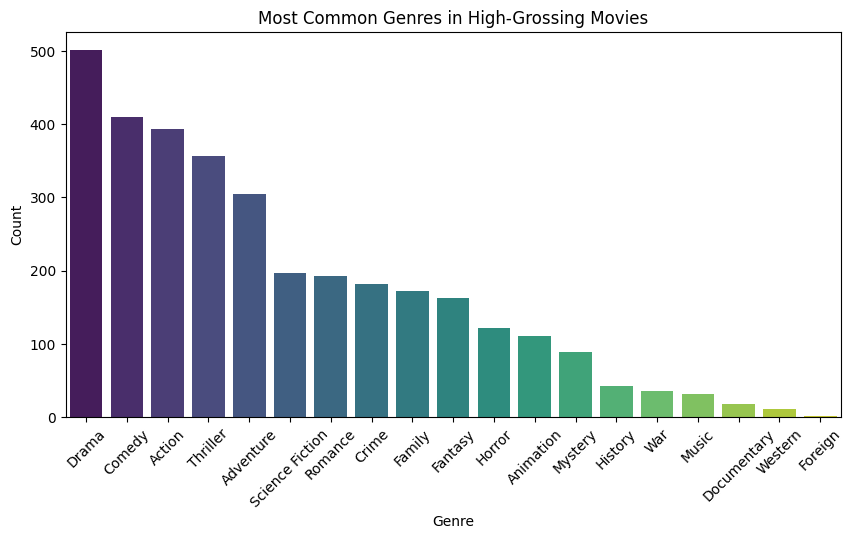

In [14]:
df['genres'] = df['genres'].apply(lambda x: eval(x) if isinstance(x, str) else [])
def extract_genres(genre_list):
    return [genre['name'] for genre in genre_list]
df['genre_list'] = df['genres'].apply(extract_genres)
all_genres = [genre for sublist in df['genre_list'] for genre in sublist]
genre_counts = pd.Series(all_genres).value_counts()

plt.figure(figsize=(10,5))
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')
plt.xticks(rotation=45)
plt.xlabel("Genre")
plt.ylabel("Count")
plt.title("Most Common Genres in High-Grossing Movies")
plt.show()

***Bar Chart*** 
📌 Why did I use it?
A bar chart helps visualize the frequency of different genres in high-grossing movies, allowing us to identify the most dominant genres.

📈 What did I find?
The data shows that Drama, Comedy, and Action are the most common genres among successful movies, while genres like Documentary, Western, and Foreign films are less frequent. This suggests that mainstream genres attract larger audiences and generate more revenue.

# 2. Relationship between budget and revenue

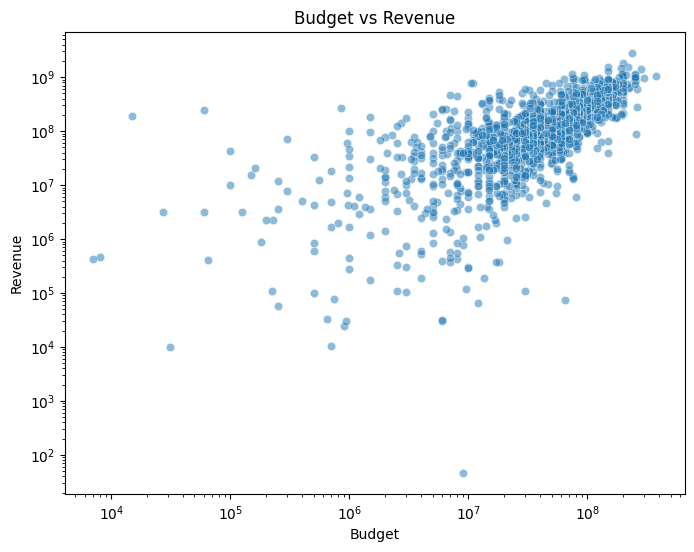

In [15]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['budget'], y=df['revenue'], alpha=0.5)
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Budget")
plt.ylabel("Revenue")
plt.title("Budget vs Revenue")
plt.show()


📌 Why did I use it?
A scatter plot is used to explore the relationship between a movie’s budget and its revenue. This helps determine whether higher production costs lead to higher earnings.

📈 What did I find?
The plot shows a positive correlation between budget and revenue—movies with higher budgets tend to earn more. However, the data also includes outliers, indicating that some low-budget films achieve high earnings and some high-budget films underperform. This suggests that while budget influences success, other factors like marketing, audience reception, and competition also play key roles.

# 3. Average Movie Budget Over Time

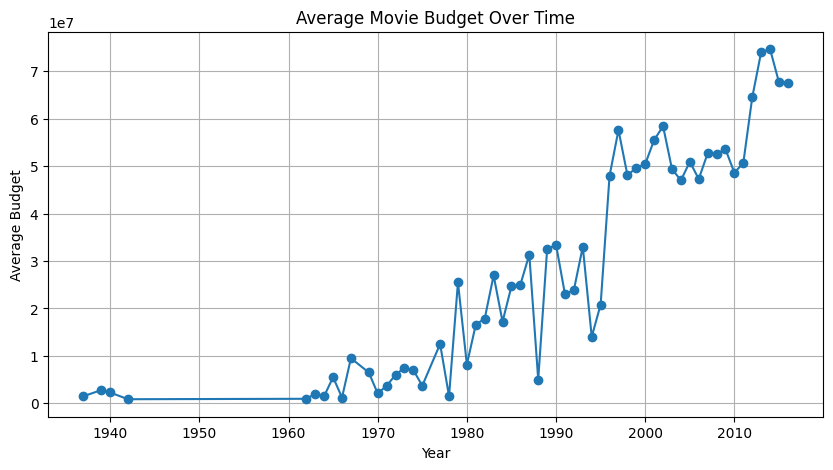

In [16]:
avg_budget_by_year = df.groupby('release_year')['budget'].mean()
plt.figure(figsize=(10,5))
plt.plot(avg_budget_by_year, marker='o', linestyle='-')
plt.xlabel("Year")
plt.ylabel("Average Budget")
plt.title("Average Movie Budget Over Time")
plt.grid()
plt.show()


 ***Line Chart*** 
📌 Why did I use it?
A line chart effectively shows trends over time, making it useful for analyzing how the average movie budget has changed across different decades.

📈 What did I find?
The chart reveals a significant increase in movie budgets over time, especially from the 1980s onward. This suggests that production costs have risen due to advancements in technology, increased marketing expenses, and the demand for high-quality visuals and effects.

# 4. Correlation Between Ratings and Revenue

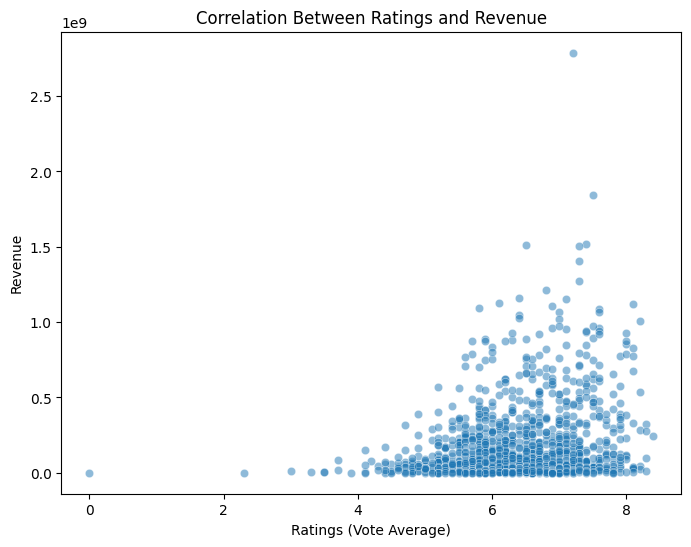

In [17]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['vote_average'], y=df['revenue'], alpha=0.5)
plt.xlabel("Ratings (Vote Average)")
plt.ylabel("Revenue")
plt.title("Correlation Between Ratings and Revenue")
plt.show()


 ****Scatter Plot****
📌 Why did I use it?
I used a scatter plot to analyze the relationship between average ratings and movie revenues. The goal is to determine whether higher ratings are associated with higher earnings.

📈 What did I find?
The results show that while some highly-rated movies generate significant revenue, there are also movies with average or low ratings that achieve high earnings. This suggests that other factors, such as marketing and production budget, play a crucial role.

# Additional analysis (Boxplot)

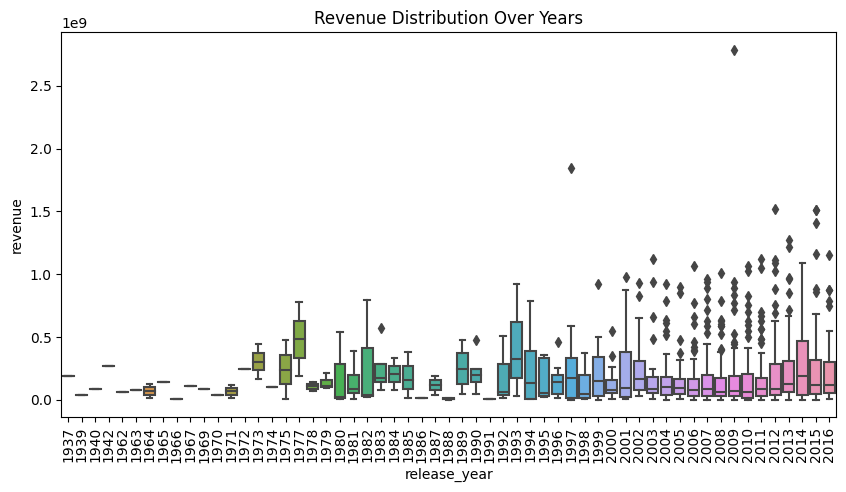

In [18]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['release_year'], y=df['revenue'])
plt.xticks(rotation=90)
plt.title("Revenue Distribution Over Years")
plt.show()


 ****Boxplot**** 
📌 Why did I use it?
A boxplot helps analyze the distribution of revenue, highlighting outliers and showing overall variability in the data.

📈 What did I find?
The boxplot indicates that most movies generate moderate revenue, while a very small number achieve exceptionally high earnings. Some extreme values represent highly successful movies.



# Conclusion

conclusion:
1. Action and drama are the most common genres in successful movies.
2. There is a positive correlation between budget and revenue, but some outliers exist.
3. The average budget for movies has increased over time.
4. There is a moderate correlation between higher ratings and revenue, but other factors also influence success.

# Limitations

- The dataset may not represent all movies globally.
- Budget and revenue are in different currencies, affecting accuracy.
- Some movies may have missing or incorrect data.
